In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from sklearn.linear_model import LinearRegression

# Primeira etapa

- Massa: 0,05045 Kg
- Largura: 1,79 m
- Tensão: 0,49 N

## Erro de medida do gerador de frequência



$$
\Delta \bar{f} = \frac{R}{2} \cdot \text{Numero de medidas} 
$$
onde $R = \text{Resolucao da medida}$

In [8]:
N_por_f = pd.read_csv("Tabela.csv")
erro_em_f = 0.5 * len(N_por_f["f"].values)

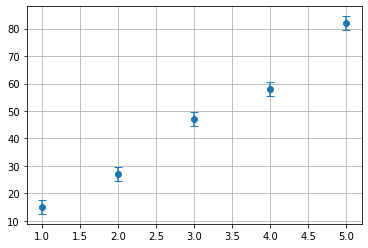

In [18]:
plt.errorbar(N_por_f["n"], N_por_f["f"], yerr=np.ones_like(N_por_f["f"].values)*erro_em_f, fmt="o", capsize=4)
plt.grid()

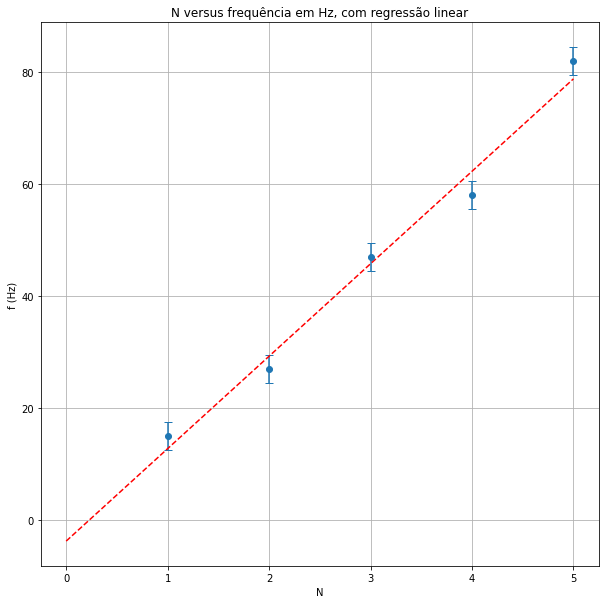

In [35]:
model = LinearRegression()
model.fit(N_por_f["n"].values.reshape(-1, 1), N_por_f["f"])
x = np.linspace(0, 5, 100)
predictions = model.predict(x.reshape(-1, 1))

plt.figure(figsize=(10,10))
plt.errorbar(N_por_f["n"], N_por_f["f"], yerr=np.ones_like(N_por_f["f"].values)*erro_em_f, fmt="o", capsize=4)
plt.plot(x, predictions, '--', c="red")
plt.xlabel("N")
plt.ylabel("f (Hz)")
plt.title("N versus frequência em Hz, com regressão linear") 
plt.grid()
plt.savefig("N_F_RL.png")

In [27]:
SQRT_T_MI2L = model.coef_[0]
SQRT_T_MI2L

16.499999999999996

# Extraindo a velocidade da constante

$$
f_n = \frac{n}{2L} \cdot \sqrt{\frac{T}{\mu}}
$$

Pela regração linear
$$
\frac{1}{2L} \cdot \sqrt{\frac{T}{\mu}} \approx 16.5
$$

In [29]:
L = 1.79
velocidade_de_propagação_por_regressão = SQRT_T_MI2L * 2 * L
velocidade_de_propagação_por_regressão

59.069999999999986

$$
v = 59.07
$$

Experimentalmente:
$$
v = \sqrt{\frac{T}{\mu}} + \Delta v
$$
$$
\Delta T = \sqrt{\left(\frac{\partial T}{\partial m}\right)^2 (\Delta m)^2} = 0.0001 N
$$
$$
\Delta \mu = \sqrt{\left(\frac{\partial\mu}{\partial m}\right)^2 (\Delta m)^2 + \left(\frac{\partial\mu}{\partial x}\right)^2\left(\Delta x\right)^2} = 0.000006 \approx 0
$$
$$
\Delta v = \sqrt{\left(\frac{\partial v}{\partial T}\right)^2(\Delta T)^2} = 0.00017
$$

# Segunda Etapa

In [4]:
N_por_M = pd.read_csv("Massas.csv")
N_por_M["T"] = N_por_M["m"]*9.8

In [5]:
N_por_M

,m,f,calculado,T
0,0.05045,15,15.063855,0.49441
1,0.06045,16,16.489356,0.59241
2,0.07045,18,17.801068,0.69041
3,0.08045,20,19.022543,0.78841
4,0.09045,22,20.170183,0.88641


In [10]:
T_err = 0.0001*len(N_por_M["T"])
T_err

0.0005

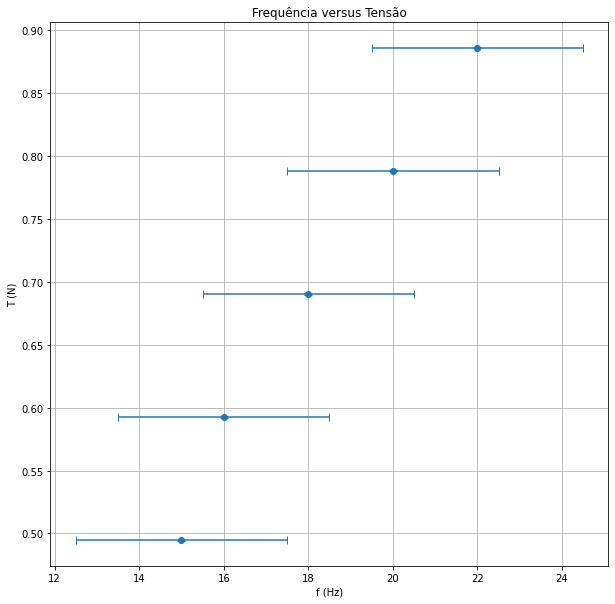

In [9]:
plt.figure(figsize=(10, 10))
plt.errorbar(N_por_M["f"], N_por_M["T"], yerr=np.ones_like(N_por_M["T"].values)*T_err, xerr=np.ones_like(N_por_M["f"].values)*erro_em_f, fmt="o", capsize=4)
plt.xlabel("f (Hz)")
plt.ylabel("T (N)")
plt.title("Frequência versus Tensão")
plt.grid()
plt.savefig("F_T.png")

In [46]:
N_por_M["f2"] = N_por_M["f"]**2

In [61]:
N_por_M

,m,f,calculado,T,f2
0,0.05045,15,15.063855,0.49441,225
1,0.06045,16,16.489356,0.59241,256
2,0.07045,18,17.801068,0.69041,324
3,0.08045,20,19.022543,0.78841,400
4,0.09045,22,20.170183,0.88641,484


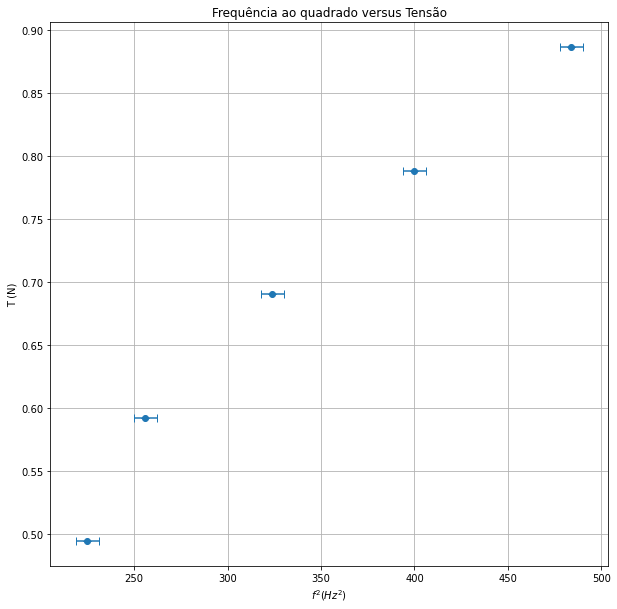

In [62]:
plt.figure(figsize=(10, 10))
plt.errorbar(N_por_M["f2"], N_por_M["T"], yerr=np.ones_like(N_por_M["T"].values)*T_err, xerr=np.ones_like(N_por_M["f"].values)*erro_em_f**2, fmt="o", capsize=4)
plt.xlabel(r"$f^2 (Hz^2)$")
plt.ylabel("T (N)")
plt.title("Frequência ao quadrado versus Tensão")
plt.grid()
plt.savefig("F2_T.png")

$$
f_n = \frac{n}{2L} \sqrt{\frac{T}{\mu}}
$$
n = 1
$$
f = \frac{1}{2L} \sqrt{\frac{T}{\mu}}
$$
$$
f^2 = \frac{1}{4L^2} \cdot \frac{T}{\mu}
$$
se chamarmos $f(T)^2 = g(T)$ temos uma relação linear entre $g(T)$ e $T$

In [59]:
model_F_T = LinearRegression()
model_F_T.fit(N_por_M["T"].values.reshape(-1, 1), N_por_M["f2"])

LinearRegression()

In [71]:
x = np.linspace(0.49, 0.9, 100)
predictions = model_F_T.predict(x.reshape(-1, 1))

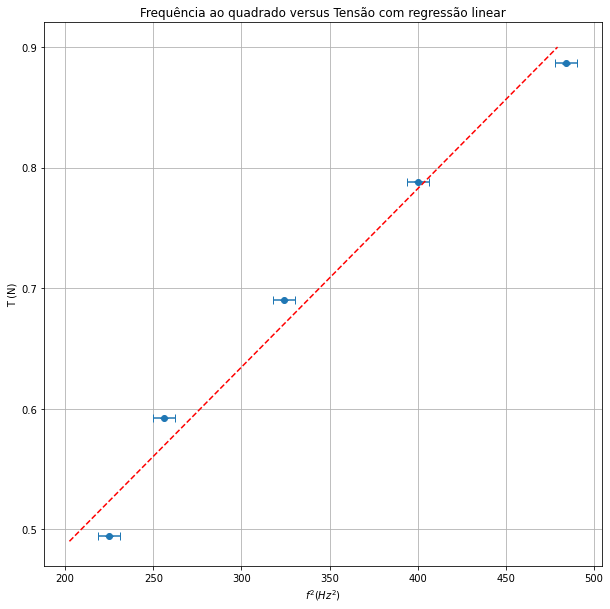

In [72]:
plt.figure(figsize=(10, 10))
plt.errorbar(N_por_M["f2"], N_por_M["T"], yerr=np.ones_like(N_por_M["T"].values)*T_err, xerr=np.ones_like(N_por_M["f"].values)*erro_em_f**2, fmt="o", capsize=4)
plt.plot(predictions, x, "--", c="red")
plt.xlabel(r"$f^2 (Hz^2)$")
plt.ylabel("T (N)")
plt.title("Frequência ao quadrado versus Tensão com regressão linear")
plt.grid()
plt.savefig("F2_T_RL.png")

$$
f^2 = g(T) = \frac{1}{4L^2} \cdot \frac{T}{\mu}
$$
$$
f^2 = g(T) = \frac{1}{4L^2\mu} \cdot T
$$
$$
\text{coef} = \frac{1}{4L^2\mu}
$$
$$
\text{coef} \cdot 4L^2 = \mu^{-1}
$$
$$
\mu = (\text{coef} 4 L^2)^{-1}
$$

In [75]:
mu, = (model_F_T.coef_ * 4 * L**2)**-1

In [78]:
mu

0.00011550533205614298

$$
\mu_{\text{medido}} = 0.00017
$$
$$
\mu_{\text{calculado}} = 0.00011
$$